In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
train_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/X_train.csv')
train_y=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/y_train.csv')
test_X=pd.read_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/X_test.csv')
train_data=pd.concat([train_X,train_y],axis=1)
train_data.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.063263,0.084948,-0.349375,0.011868,0.031478,-0.274085,-0.251952,-0.211938,-0.102764,...,-0.022743,0.024163,0.049821,0.047753,-0.004774,-0.047699,-0.175425,-0.292578,-0.270416,-0.285809
sex,-0.063263,1.000000,-0.031386,0.000246,0.065084,0.092872,0.120474,0.098931,0.132744,0.103423,...,0.065013,0.119453,0.073253,0.303911,0.355708,0.136619,0.050774,-0.116840,-0.117108,-0.148643
age,0.084948,-0.031386,1.000000,-0.049042,0.004668,-0.020201,-0.163523,-0.156432,-0.109246,-0.059225,...,-0.015539,0.007586,0.113375,0.095421,0.050070,-0.011480,0.142970,-0.195024,-0.125900,-0.121109
address,-0.349375,0.000246,-0.049042,1.000000,0.077496,-0.083989,0.204824,0.157080,0.135229,0.004643,...,-0.045161,-0.051986,-0.006007,-0.065458,-0.026309,-0.028554,0.053831,0.157367,0.162732,0.166606
famsize,0.011868,0.065084,0.004668,0.077496,1.000000,-0.229021,-0.016148,-0.037524,0.022208,-0.055414,...,-0.012963,-0.036106,0.030654,0.061870,0.089230,-0.014699,0.014490,0.043116,0.018303,0.023861
Pstatus,0.031478,0.092872,-0.020201,-0.083989,-0.229021,1.000000,-0.040572,-0.033045,-0.015019,0.037688,...,0.049954,0.048954,0.028997,0.059687,0.051948,-0.006998,-0.109772,0.008443,0.017045,-0.000908
Medu,-0.274085,0.120474,-0.163523,0.204824,-0.016148,-0.040572,1.000000,0.638774,0.446133,0.147972,...,0.032507,-0.025654,-0.007327,-0.014514,-0.006635,0.017654,-0.044910,0.263885,0.257076,0.237078
Fedu,-0.251952,0.098931,-0.156432,0.157080,-0.037524,-0.033045,0.638774,1.000000,0.266189,0.188463,...,0.025505,0.008957,0.027127,0.010997,0.053486,0.024675,0.021309,0.199027,0.202598,0.195531
Mjob,-0.211938,0.132744,-0.109246,0.135229,0.022208,-0.015019,0.446133,0.266189,1.000000,0.227409,...,0.026140,0.041783,-0.005206,0.043130,0.018527,0.080399,0.020708,0.155289,0.107383,0.112329
Fjob,-0.102764,0.103423,-0.059225,0.004643,-0.055414,0.037688,0.147972,0.188463,0.227409,1.000000,...,0.016869,-0.026320,-0.030555,0.051090,0.046870,-0.036462,-0.061624,0.101152,0.086697,0.060498


In [10]:
train_X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,19,1,0,1,2,2,3,3,...,0,4,3,3,1,1,5,0,10,10
1,0,0,16,1,1,1,4,4,4,4,...,0,4,5,2,1,2,3,0,11,10
2,1,0,18,1,0,0,2,4,2,3,...,0,2,3,2,1,3,1,8,8,5
3,0,0,20,0,0,1,2,1,2,2,...,1,1,2,3,1,2,2,8,10,12
4,1,1,19,1,0,1,2,1,0,2,...,1,4,4,3,1,3,5,4,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,0,1,15,1,0,1,4,4,2,4,...,0,4,4,3,1,1,2,4,16,15
515,0,0,15,1,0,1,3,2,3,2,...,0,4,3,5,1,1,2,16,11,10
516,1,0,15,0,0,1,1,1,0,0,...,0,4,2,1,1,2,2,0,13,14
517,1,0,16,1,1,1,4,4,3,3,...,0,5,1,3,1,2,5,1,11,11


<AxesSubplot:xlabel='higher', ylabel='G3'>

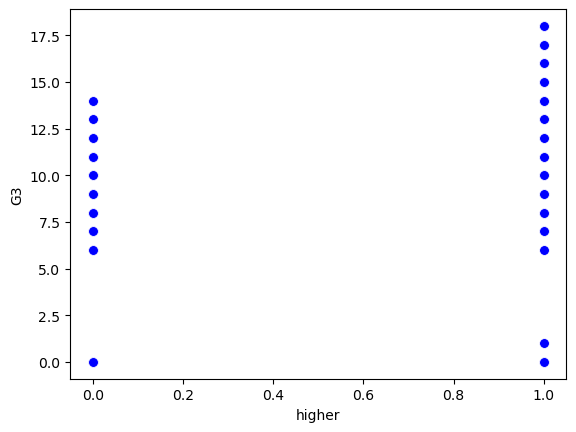

In [11]:
import seaborn as sns 

sns.scatterplot(x=train_data['higher'],y=train_data['G3'],color='b',
                s=50,
                marker='o')

<AxesSubplot:xlabel='G1', ylabel='G3'>

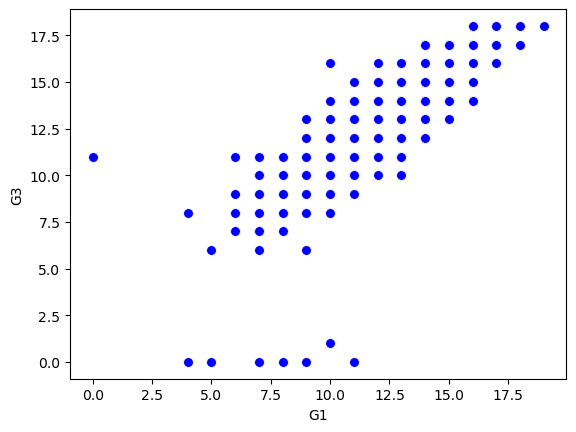

In [12]:
import seaborn as sns 

sns.scatterplot(x=train_data['G1'],y=train_data['G3'],color='b',
                s=50,
                marker='o')

<AxesSubplot:xlabel='G2', ylabel='G3'>

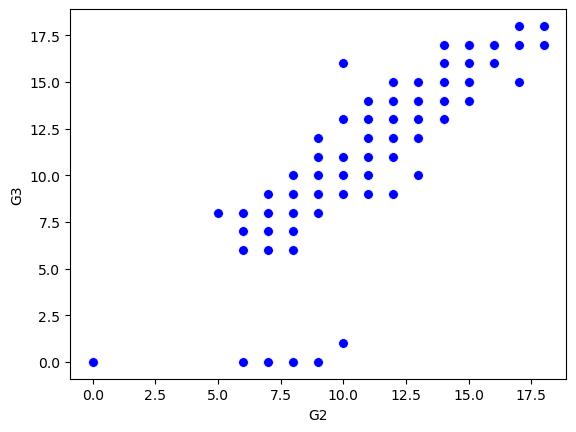

In [13]:
import seaborn as sns 

sns.scatterplot(x=train_data['G2'],y=train_data['G3'],color='b',
                s=50,
                marker='o')

In [14]:
# 파생 변수  만들기

train_X['total']=train_X['G1']+train_X['G2']
train_X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,total
0,0,0,19,1,0,1,2,2,3,3,...,4,3,3,1,1,5,0,10,10,20
1,0,0,16,1,1,1,4,4,4,4,...,4,5,2,1,2,3,0,11,10,21
2,1,0,18,1,0,0,2,4,2,3,...,2,3,2,1,3,1,8,8,5,13
3,0,0,20,0,0,1,2,1,2,2,...,1,2,3,1,2,2,8,10,12,22
4,1,1,19,1,0,1,2,1,0,2,...,4,4,3,1,3,5,4,8,9,17


In [15]:
test_X['total']=test_X['G1']+test_X['G2']

In [16]:
train_X=train_X.drop(['famsize','Pstatus','Fjob','guardian','schoolsup','paid','activities','nursery','romantic','romantic','famrel','goout'],axis=1)
test_X=test_X.drop(['famsize','Pstatus','Fjob','guardian','schoolsup','paid','activities','nursery','romantic','romantic','famrel','goout'],axis=1)

(array([ 14.,   0.,   0.,  11.,  30., 107., 135., 117.,  68.,  37.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

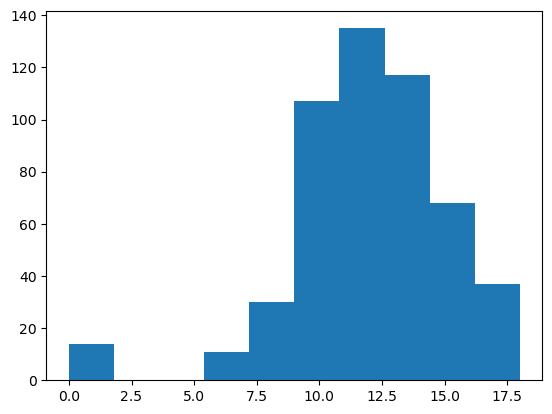

In [17]:
plt.hist(train_y['G3'], bins=10)

In [18]:
train_X.to_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_train.csv',index=False)
test_X.to_csv('/home/iai/heo/datamining_project/3.Student performance/dataset/preprocessed_X_test.csv',index=False)
